# 73. Set Matrix Zeroes
https://leetcode.com/problems/set-matrix-zeroes/description/

Given an m x n integer matrix matrix, if an element is 0, set its entire row and column to 0's.

You must do it in place.

 

Example 1:


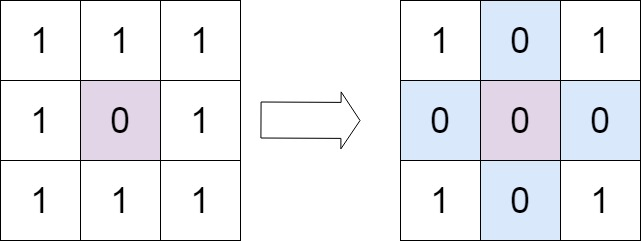

Input: matrix = [[1,1,1],[1,0,1],[1,1,1]]
Output: [[1,0,1],[0,0,0],[1,0,1]]


Example 2:

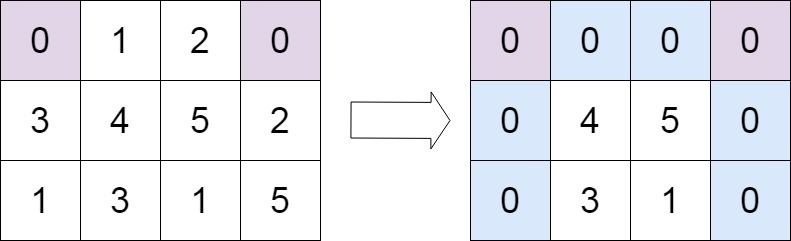
Input: matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
Output: [[0,0,0,0],[0,4,5,0],[0,3,1,0]]
 

Constraints:

m == matrix.length
n == matrix[0].length
1 <= m, n <= 200
-231 <= matrix[i][j] <= 231 - 1
 

Follow up:

A straightforward solution using O(mn) space is probably a bad idea.
A simple improvement uses O(m + n) space, but still not the best solution.
Could you devise a constant space solution?

## Hint

Hint 1: 
If any cell of the matrix has a zero we can record its row and column number using additional memory. But if you don't want to use extra memory then you can manipulate the array instead. i.e. simulating exactly what the question says.

Hint 2:
Setting cell values to zero on the fly while iterating might lead to discrepancies. What if you use some other integer value as your marker? There is still a better approach for this problem with 0(1) space.

Hint 3:
We could have used 2 sets to keep a record of rows/columns which need to be set to zero. But for an O(1) space solution, you can use one of the rows and and one of the columns to keep track of this information.

Hint 4:
We can use the first cell of every row and column as a flag. This flag would determine whether a row or column has been set to zero.




# Brute Force

In [26]:

def setZeroes(matrix):

    array_rows, array_cols = [], []
    m, n = len(matrix), len(matrix[0])

    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 0:
                array_rows.append(i)
                array_cols.append(j)

    for i in range(m):
        for j in range(n):
            if(i in array_rows or j in array_cols): # the "in" operation takes O(n) which make the overall complexity (N^3)
                matrix[i][j] = 0
    
    print(array_rows)
    print(array_cols)
    return matrix

matrix = [[1,1,1],[1,0,1],[1,1,1]]
print(setZeroes(matrix))

matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
print(setZeroes(matrix))


[1]
[1]
[[1, 0, 1], [0, 0, 0], [1, 0, 1]]
[0, 0]
[0, 3]
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


# A better solution

Using `set()`

In [30]:

def setZeroes(matrix):

    array_rows, array_cols = set(), set()
    m, n = len(matrix), len(matrix[0])

    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 0:
                array_rows.add(i)
                array_cols.add(j)

    for i in range(m):
        for j in range(n):
            if(i in array_rows or j in array_cols):
                matrix[i][j] = 0
    
    print(array_rows)
    print(array_cols)
    return matrix

matrix = [[1,1,1],[1,0,1],[1,1,1]]
print(setZeroes(matrix))

matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
print(setZeroes(matrix))

{1}
{1}
[[1, 0, 1], [0, 0, 0], [1, 0, 1]]
{0}
{0, 3}
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


# Neet Solution 

the space complexity of the code is O(m+n)

In [33]:
def setZeroes(matrix):

    rows_and_cols_zeroes_index= set() 
    m, n = len(matrix), len(matrix[0])

    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 0:
                rows_and_cols_zeroes_index.add(i)
                rows_and_cols_zeroes_index.add(j)

    for i in range(m):
        for j in range(n):
            if(i in rows_and_cols_zeroes_index or j in rows_and_cols_zeroes_index):
                matrix[i][j] = 0
    
    # print(rows_and_cols_zeroes_index)
    #print(array_cols)
    return matrix

matrix = [[1,1,1],[1,0,1],[1,1,1]]
print(setZeroes(matrix))

matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
print(setZeroes(matrix))

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


In [19]:
#!pip install numpy

# Use Numpy

This solution has a time complexity of O(mn), where m and n are the number of rows and columns in the matrix. It has a space complexity of O(m + n), as it uses extra memory to store the indices of the zero elements

In [32]:
import numpy as np

def setZeroes(matrix):
  # convert the matrix to a numpy array
  array = np.array(matrix) # O(n) 

  # get the number of rows and columns
  #m, n = array.shape

  # find the indices of the zero elements
  zero_rows, zero_cols = np.where(array == 0) # 
  print(zero_rows)
  print(zero_cols)

  # set the corresponding rows and columns to zero
  array[zero_rows, :] = 0
  array[:, zero_cols] = 0

  # return the modified matrix
  return array.tolist()


matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
print(setZeroes(matrix))

[0 0]
[0 3]
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


# Optimized

In [15]:
class Solution:
    def setZeroes(self, matrix: list[list[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        m, n = len(matrix), len(matrix[0])
        print(m, n)
        row_zero, col_zero = False, False

        # Check if first row and column should be zeroed out
        for i in range(m):
            if matrix[i][0] == 0:
                col_zero = True
                break
        print(matrix)
        for j in range(n):
            if matrix[0][j] == 0:
                row_zero = True
                break
        print(matrix)


        # Use first row and column as flags to mark zero rows and columns
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][j] == 0:
                    matrix[i][0] = 0
                    matrix[0][j] = 0
        
        print(matrix)


        # Zero out rows and columns based on flags
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][0] == 0 or matrix[0][j] == 0:
                    matrix[i][j] = 0

        print(matrix)


        # Zero out first row and column if necessary
        if row_zero:
            for j in range(n):
                matrix[0][j] = 0
        if col_zero:
            for i in range(m):
                matrix[i][0] = 0
        
        return matrix

sol = Solution()
# matrix = [[1,1,1],[1,0,1],[1,1,1]]
# print(sol.setZeroes(matrix))

matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
print(sol.setZeroes(matrix))

3 4
[[0, 1, 2, 0], [3, 4, 5, 2], [1, 3, 1, 5]]
[[0, 1, 2, 0], [3, 4, 5, 2], [1, 3, 1, 5]]
[[0, 1, 2, 0], [3, 4, 5, 2], [1, 3, 1, 5]]
[[0, 1, 2, 0], [3, 4, 5, 0], [1, 3, 1, 0]]
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]
